In [15]:
%matplotlib inline

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
! cargo run --package dyn_flow --example ein  > ein.csv

    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `c:\Users\mtta2\Desktop\Desktop\2_Programming\Rust\numerical_sim\Equation of Motion\dyn_flow\target\debug\examples\ein.exe`


In [18]:
df = np.arccos(pd.read_csv("ein.csv", header=None))

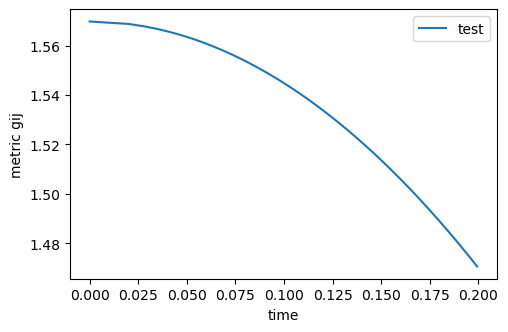

In [19]:
fig = plt.gcf()
fig.set_size_inches(5.5,3.5)

x = df[1]
y = df[0]

plt.plot(x, y, label="test")
plt.legend()
plt.xlabel("time")
plt.ylabel("metric gij")

img_name = 'ein.png'
fig.savefig(img_name, dpi=100)

plt.show()


radius = 1.2529151314547327


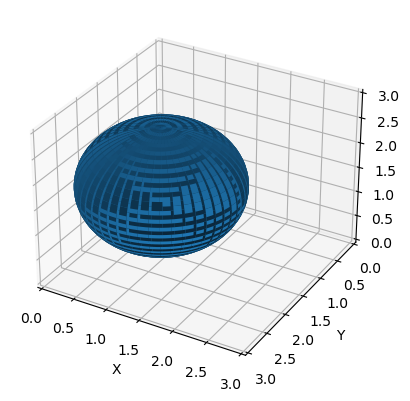

In [20]:

# Draw unit sphere
import math

r = math.sqrt(y[0]) # init radius
print(f"radius = {r}")

theta_1_0 = np.linspace(0, 2*np.pi, 100)
theta_2_0 = np.linspace(0, 2*np.pi, 100)
theta_1, theta_2 = np.meshgrid(theta_1_0, theta_2_0)

x = np.cos(theta_2)*np.sin(theta_1) * r
y = np.sin(theta_2)*np.sin(theta_1) * r
z = np.cos(theta_1) * r

fig = plt.figure() # 描画領域を作成
ax = fig.add_subplot(111, projection="3d") # 3Dの軸を作成
ax.plot_surface(x,y,z) # 球を３次元空間に表示
plt.xlim([0,3])
plt.ylim([3,0]) # Y軸の表示は初期値とは逆にする

ax.set_zlim([0,3])
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")

img_name = 'ein.png'
plt.savefig(img_name, dpi=1000)
plt.show()


read (x, y, z) data
plot graph


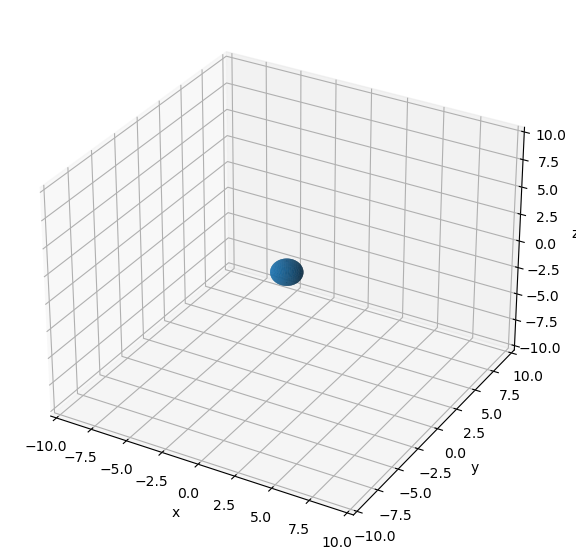

In [21]:
# Draw gif animation
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import sys

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection = '3d')

def update(num,x,y,z,r,plot):
    plot[0].remove()
    x_ = r[num]*x
    y_ = r[num]*y
    z_ = r[num]*z
    plot[0] = ax.plot_surface(x_, y_, z_, cmap="plasma")

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

r =  np.hstack((np.linspace(0, 10, 50), np.linspace(10, 0, 50)))
# r = math.sqrt(y) # init radius
# r = df[0] # init radius

print("read (x, y, z) data")
x = np.outer(np.cos(u), np.sin(v)) 
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# limiter
r_max = max(r)
ax.set_xlim(-r_max,r_max)
ax.set_ylim(-r_max,r_max)
ax.set_zlim(-r_max,r_max)

# set labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.set_aspect('equal')

print("plot graph")
plot= [ax.plot_surface(x, y, z)]

mk_gif = False

if mk_gif == True:
    print("make animation...")
    frame = 100
    interval = 100 # [ms]
    ani = animation.FuncAnimation(fig, update, frame, fargs=(x,y,z,r,plot), interval=interval)
    HTML(ani.to_html5_video())

    # save gif image
    print("save gif animation...")
    dpi = 100
    gif_name = 'expand_ball.gif'
    ani.save(gif_name, writer="ffmpeg",dpi=dpi)

    print("show graph")
    from IPython.display import Image
    Image(filename=gif_name)
